In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import HTML

In [8]:
img_size=256
batchsize=32

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "potatos",
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size=batchsize

)

Found 2152 files belonging to 3 classes.


In [10]:
cls_dataset=dataset.class_names
cls_dataset

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [18]:
68*32

2176

In [31]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

batch size and each picture size
(32, 256, 256, 3)

 label batch to numpy
[1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 2 1 1 1 0 1 1 1 0 0]

 label batch
tf.Tensor([1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 2 1 1 1 0 1 1 1 0 0], shape=(32,), dtype=int32)

 batch size
32

 batch teki ilk resim
tf.Tensor(
[[[164. 153. 157.]
  [167. 156. 160.]
  [168. 157. 161.]
  ...
  [130. 118. 122.]
  [126. 114. 118.]
  [126. 114. 118.]]

 [[171. 160. 164.]
  [173. 162. 166.]
  [173. 162. 166.]
  ...
  [125. 113. 117.]
  [119. 107. 111.]
  [120. 108. 112.]]

 [[163. 152. 156.]
  [164. 153. 157.]
  [162. 151. 155.]
  ...
  [122. 110. 114.]
  [118. 106. 110.]
  [126. 114. 118.]]

 ...

 [[173. 162. 166.]
  [194. 183. 187.]
  [191. 180. 184.]
  ...
  [143. 131. 131.]
  [151. 139. 139.]
  [151. 139. 139.]]

 [[174. 163. 167.]
  [182. 171. 175.]
  [190. 179. 183.]
  ...
  [141. 129. 129.]
  [144. 132. 132.]
  [142. 130. 130.]]

 [[184. 173. 177.]
  [175. 164. 168.]
  [182. 171. 175.]
  ...
  [163. 151. 1

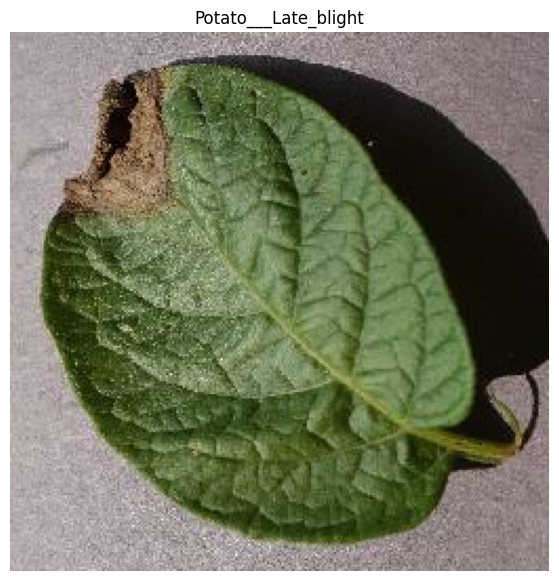

In [58]:
for image_batch,label_batch in dataset.take(1):
    print("batch size and each picture size")
    print(image_batch.shape)
    print("\n label batch to numpy")
    print(label_batch.numpy())
    print("\n label batch")
    print(label_batch)
    print("\n batch size")
    print(len(image_batch))
    print("\n 1st in batch")
    print(image_batch[0])
    print("\n array")
    print(image_batch[0].numpy())
    print("\n visualization")
    plt.figure(figsize=(8,7))
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(cls_dataset[label_batch[0]])  
    
   

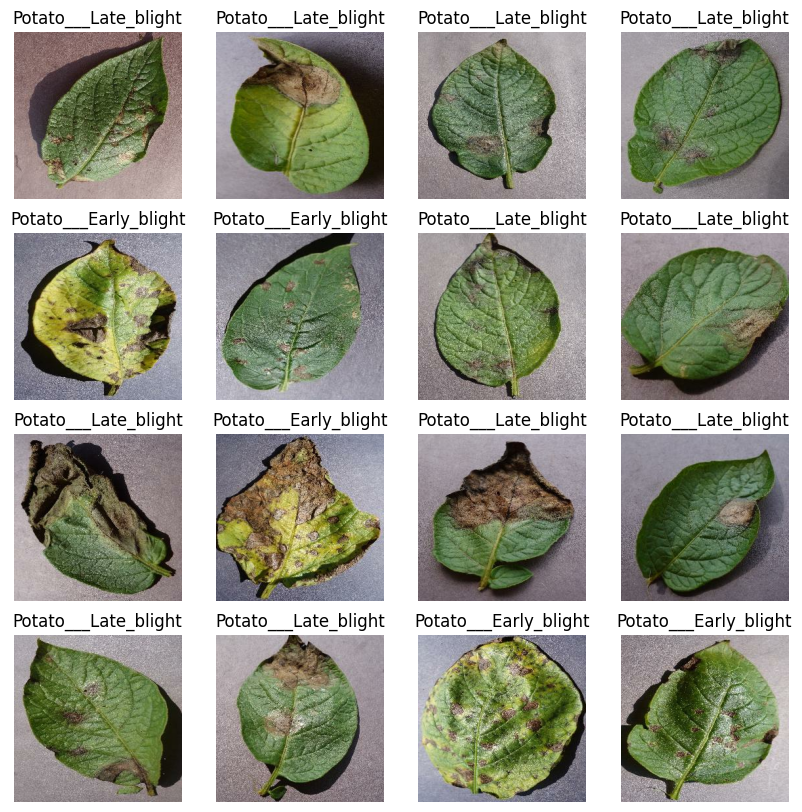

In [63]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(cls_dataset[label_batch[i]])
        plt.axis("off")
        

In [64]:
# Tensorflowda onceki makine ogrenme modelleri gibi train_test_split metodu yok farklı bir yontem kullaniliyor

In [ ]:
# burada 
80% ==> training set
10% ==> validation set 
10% ==> test set  

In [65]:
trainsize=0.8

In [66]:
len(dataset)

68

In [67]:
len(dataset)*trainsize

54.400000000000006

In [68]:
train_ds=dataset.take(54)

In [69]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [71]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [72]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [73]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [77]:
def get_dataset_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=4)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [79]:
train_ds,val_ds,test_ds=get_dataset_partitions(dataset)

In [80]:
len(train_ds)

54

In [81]:
len(val_ds)

6

In [83]:
len(test_ds)

8

In [84]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)




In [101]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size,img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])


In [102]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [110]:
inp_shape=(batchsize,image_size,img_size,3)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=inp_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64,activation='relu'),
    
    layers.Dense(n_classes,activation='softmax')

])

model.build(input_shape=inp_shape)

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_7 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [112]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [113]:
history=model.fit(train_ds,
          epochs=5, 
          batch_size=batchsize, 
          validation_data=val_ds,
          verbose=1 )

Epoch 1/5
54/54 [==============================] - 208s 4s/step - loss: 0.9105 - accuracy: 0.5058 - val_loss: 0.9114 - val_accuracy: 0.4219
Epoch 2/5
54/54 [==============================] - 177s 3s/step - loss: 0.8112 - accuracy: 0.5926 - val_loss: 0.6396 - val_accuracy: 0.6875
Epoch 3/5
54/54 [==============================] - 175s 3s/step - loss: 0.5914 - accuracy: 0.7650 - val_loss: 0.6818 - val_accuracy: 0.6979
Epoch 4/5
54/54 [==============================] - 174s 3s/step - loss: 0.4328 - accuracy: 0.8356 - val_loss: 0.7268 - val_accuracy: 0.7500
Epoch 5/5
54/54 [==============================] - 175s 3s/step - loss: 0.4084 - accuracy: 0.8293 - val_loss: 0.3359 - val_accuracy: 0.8698


In [116]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 9s 1s/step - loss: 0.3156 - accuracy: 0.8555


In [117]:
scores

[0.31560003757476807, 0.85546875]

In [118]:
history

In [119]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [120]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [121]:
history.history['accuracy']

[0.5057870149612427,
 0.5925925970077515,
 0.7650462985038757,
 0.8356481194496155,
 0.8292824029922485]

In [122]:
len(history.history['accuracy'])

5

In [129]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

lss=history.history['loss']
val_lss=history.history['val_loss']

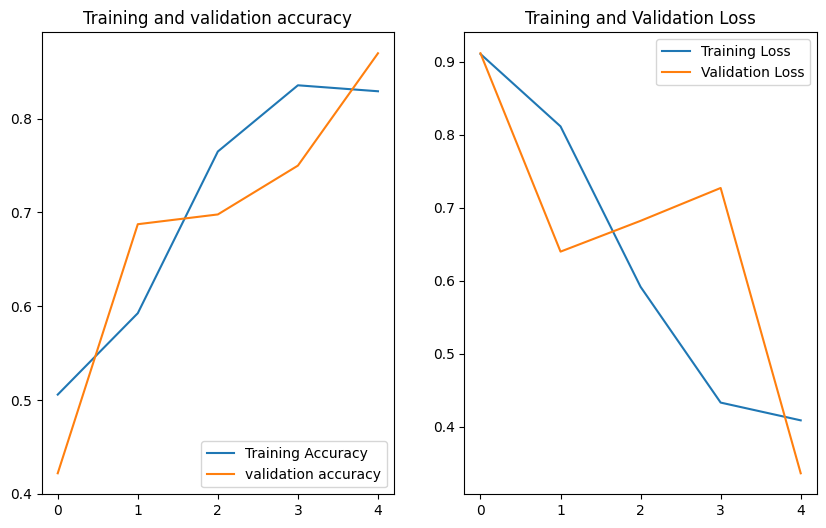

In [130]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(5),acc,label='Training Accuracy')
plt.plot(range(5),val_acc,label='validation accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), lss, label='Training Loss')
plt.plot(range(5), val_lss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Early_blight


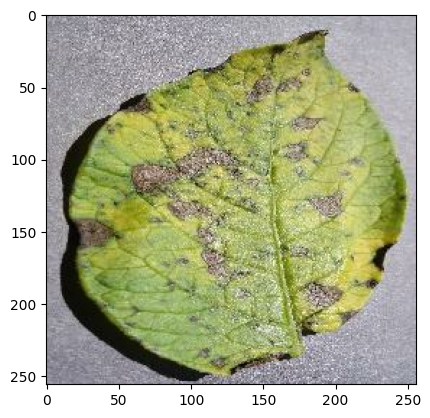

In [134]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",cls_dataset[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",cls_dataset[np.argmax(batch_prediction[0])])

In [138]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = cls_dataset[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 83ms/step


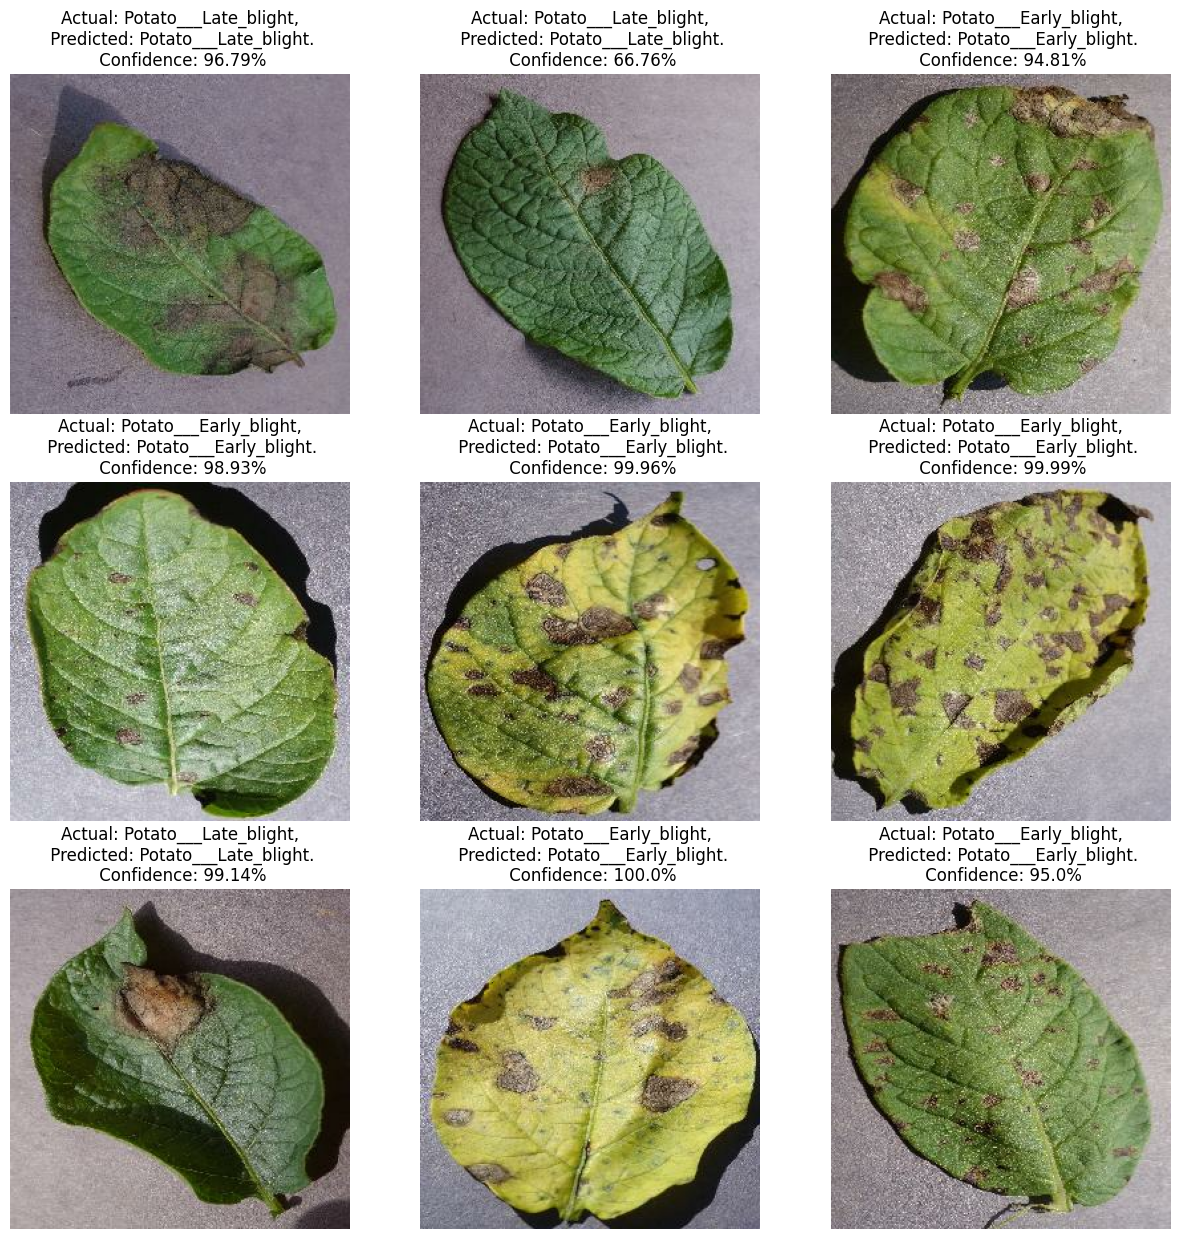

In [139]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = cls_dataset[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [142]:
model_name='potato_disease_model'
model.save(f"../potato_disease/{model_name}")

INFO:tensorflow:Assets written to: ../potato_disease/potato_disease_model\assets


INFO:tensorflow:Assets written to: ../potato_disease/potato_disease_model\assets
